In [1]:
# Import libriraies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Import data and Create a dataframe for 2020 data
df_2020 = pd.read_csv("data/2020.csv")

In [3]:
#------------------------#
# STEP 1 - Overview
#------------------------#

In [4]:
# Have a look at the begining of the datafram (head)
df_2020.head()

,country,region,score,gdp_capita,social_support,life_expectancy,freedom_life_choices,generosity,perceptions _corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


In [5]:
# Have a look at the variables type & null values (info)
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  153 non-null    object 
 1   region                   153 non-null    object 
 2   score                    153 non-null    float64
 3   gdp_capita               153 non-null    float64
 4   social_support           153 non-null    float64
 5   life_expectancy          153 non-null    float64
 6   freedom_life_choices     153 non-null    float64
 7   generosity               153 non-null    float64
 8   perceptions _corruption  153 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.9+ KB


In [6]:
# Have a look at the variables stats (describe)
df_2020.describe()

,score,gdp_capita,social_support,life_expectancy,freedom_life_choices,generosity,perceptions _corruption
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120
std,1.11227,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172
min,2.56690,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784
25%,4.72410,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019
50%,5.51500,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122
75%,6.22850,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151
max,7.80870,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585


In [7]:
#------------------------#
# STEP 2 - Exploring each variable
#------------------------#

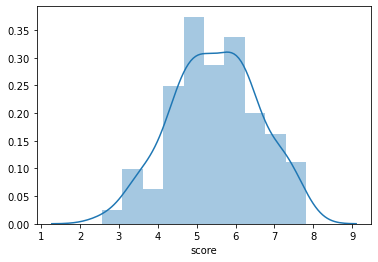

In [8]:
# Create a distribution plot for a numerical variable 
plot = sns.distplot(df_2020.score)

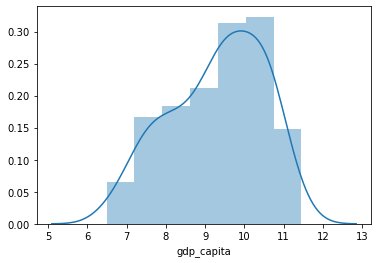

In [9]:
plot = sns.distplot(df_2020.gdp_capita)

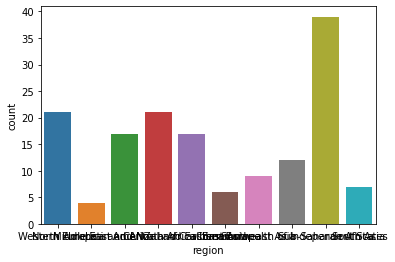

In [10]:
# Create a vertical bar chart for a categorical variable 
sns.countplot(df_2020.region);

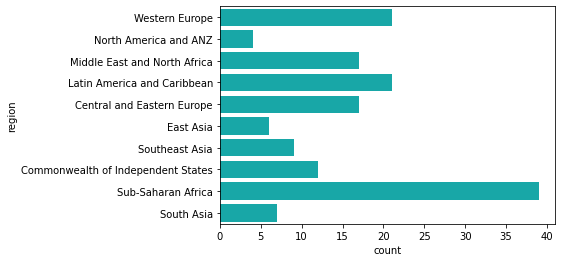

In [11]:
# [Bonus] Create a horizontal bar chart for a categorical variable 
sns.countplot(y="region", data=df_2020, color="c");

In [12]:
## [Bonus] Multiple plots for all numerical variables
#get numerical values
num_variables = df_2020.select_dtypes(exclude=['object']).columns
num_variables

Index(['score', 'gdp_capita', 'social_support', 'life_expectancy',
       'freedom_life_choices', 'generosity', 'perceptions _corruption'],
      dtype='object')

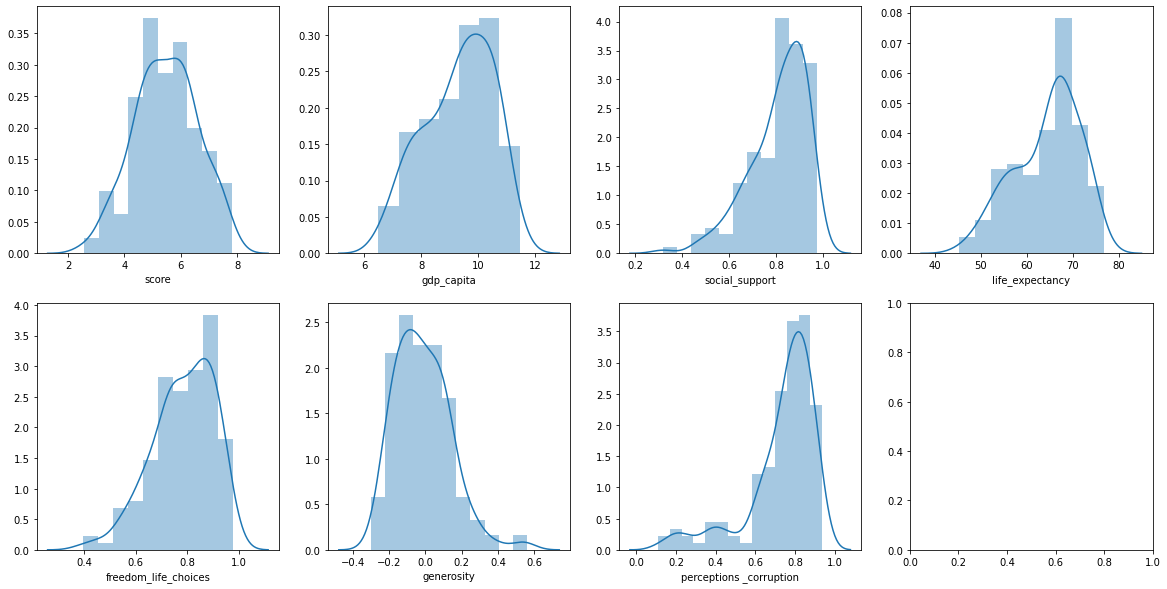

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(num_variables, ax.flatten()):
    sns.distplot(df_2020[variable], ax=subplot)

In [14]:
#------------------------#
# STEP 3 - Exploring variables relationships
#------------------------#

In [15]:
# 3-A / Staying in 2020 #
#------------------------#

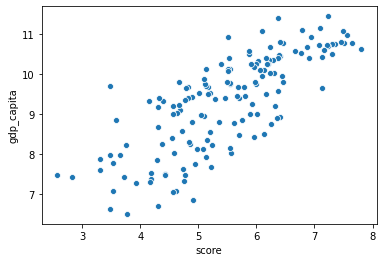

In [16]:
# 1 Numerical x 1 Numerical : Chart for the relationship between 2 numerical variables
sns.scatterplot(x="score", y="gdp_capita", data=df_2020);

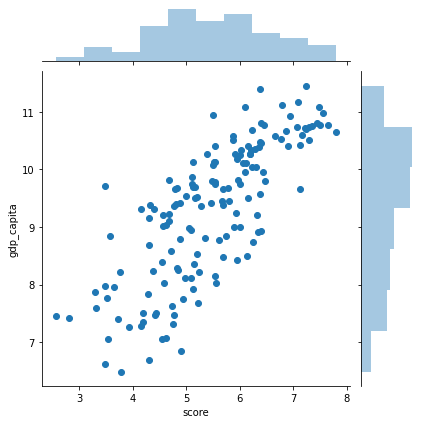

In [17]:
sns.jointplot(x="score", y="gdp_capita", data=df_2020);

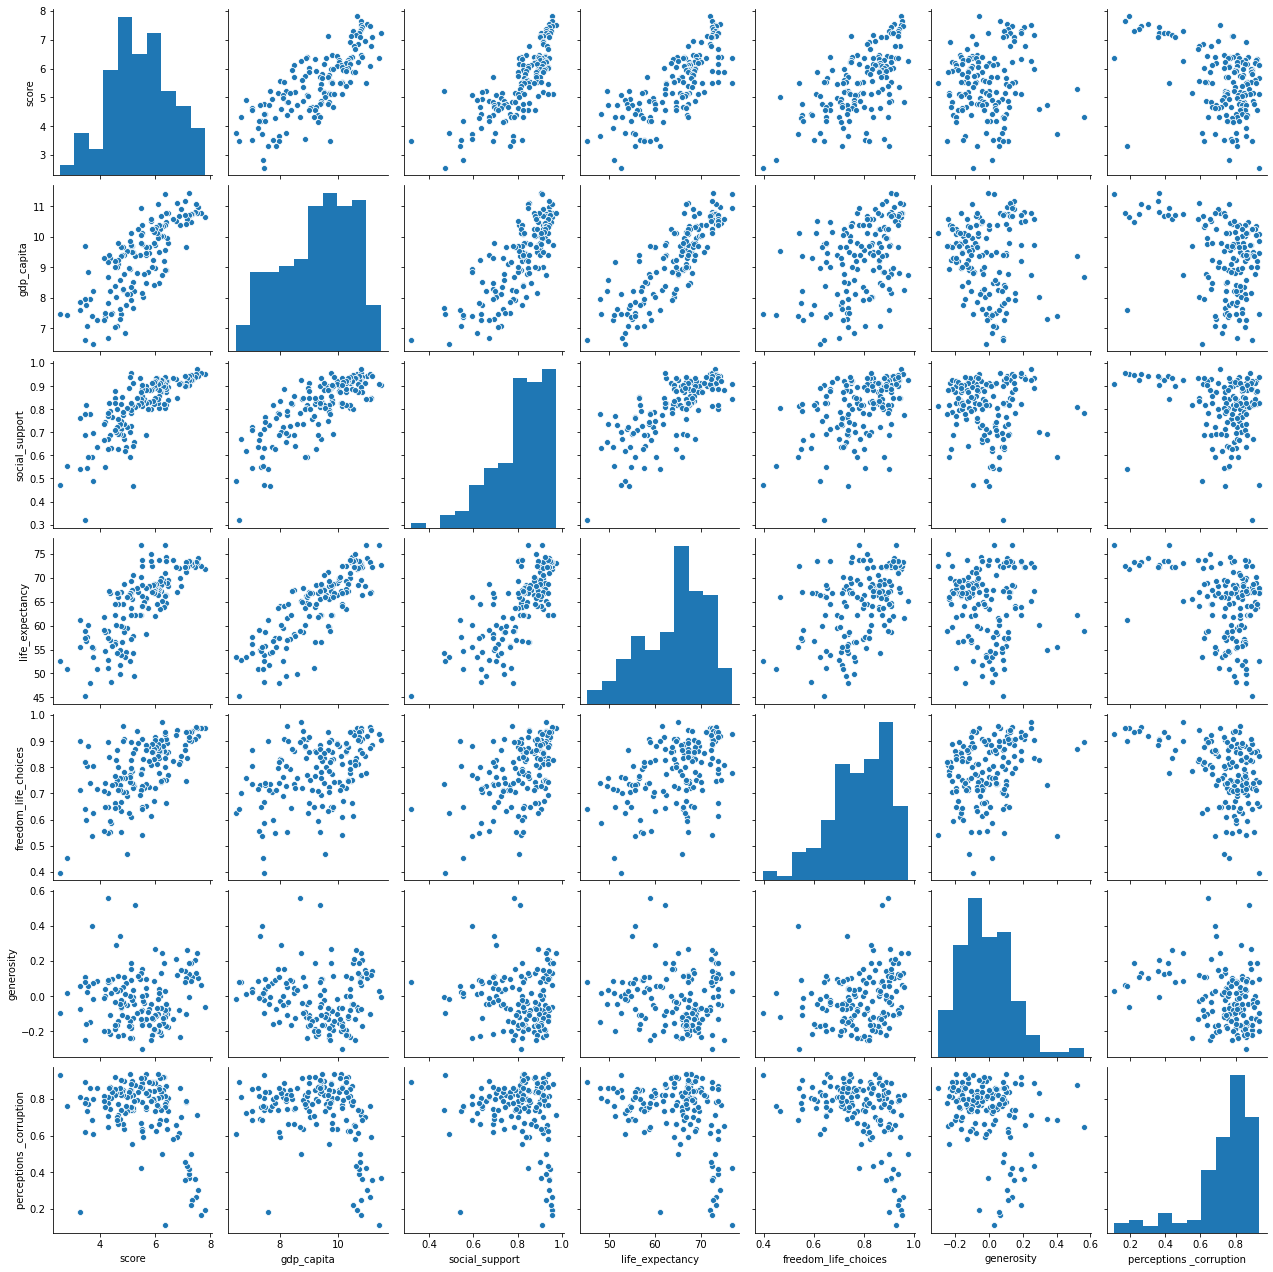

In [18]:
# [Bonus] Multiplot grid
num_variables_list = list(num_variables)
hapiness_questions_variables = num_variables_list.remove('gdp_capita')

sns.pairplot(df_2020, vars=hapiness_questions_variables);

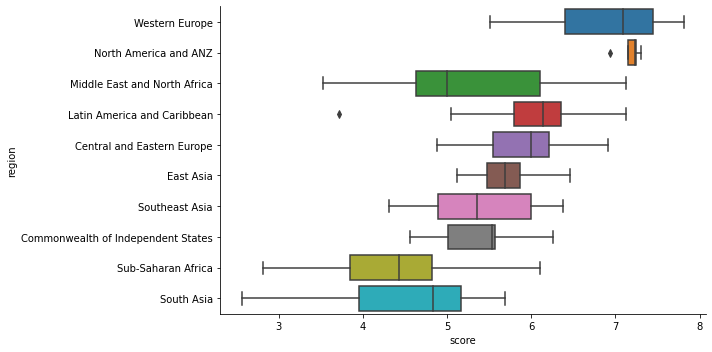

In [19]:
# 1 Categorical x 1 Numerical : Chart for the relationship between numerical & categorical variable
sns.catplot(x="score", y="region", kind="box", height=5, aspect=2, data=df_2020);

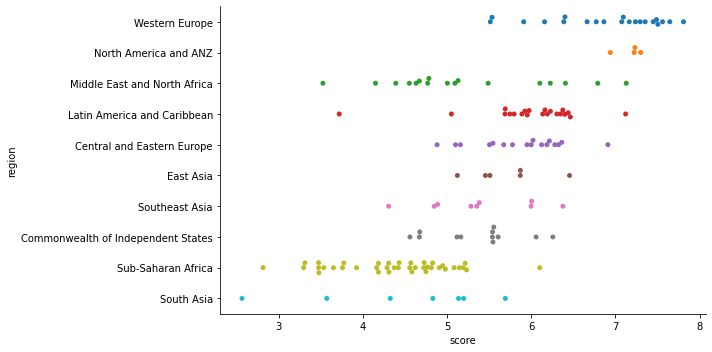

In [20]:
sns.catplot(x="score", y="region", kind="swarm", height=5, aspect=2, data=df_2020);

<Figure size 1440x360 with 0 Axes>

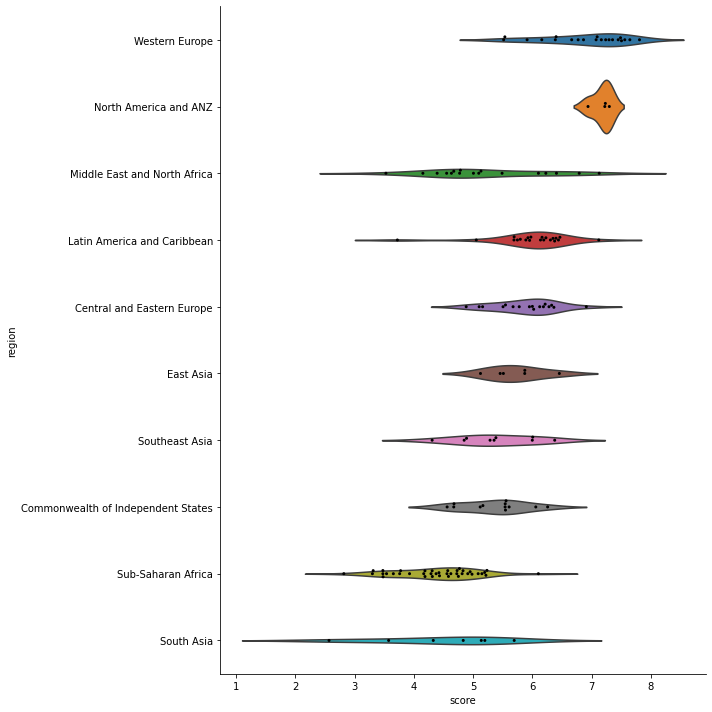

In [21]:
plt.figure(figsize=(20,5))
g = sns.catplot(x="score", y="region", kind="violin", inner=None, height=10, aspect=1, data=df_2020)
sns.swarmplot(x="score", y="region", color="k", size=3, data=df_2020, ax=g.ax);

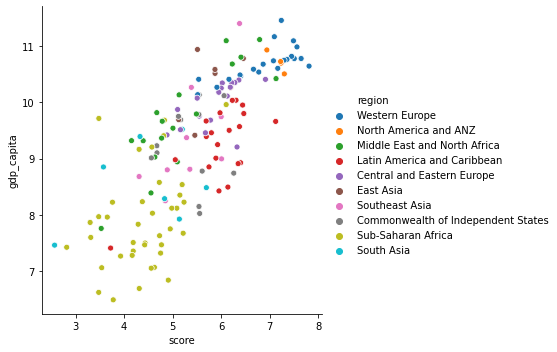

In [22]:
# 1 Categorical x 2 Numerical : Chart for the relationship between 2 numerical & 1 categorical variable
sns.relplot(x="score", y="gdp_capita", hue="region", data=df_2020);

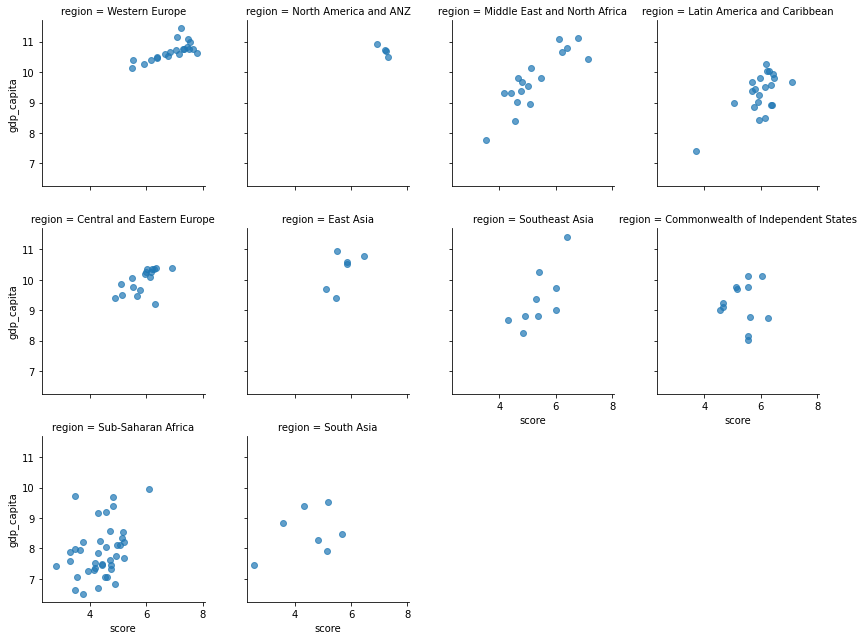

In [23]:
g = sns.FacetGrid(df_2020, col="region", col_wrap=4, height=3)
g.map(plt.scatter, "score", "gdp_capita", alpha=.7)

In [24]:
# 3-B / Looking in the past #
#------------------------#

In [25]:
# Importing data from other files, adding a 'year' column
df_2019 = pd.read_csv("data/2019.csv")[['country', 'score']]
df_2019['year'] = 2019
df_2018 = pd.read_csv("data/2018.csv")[['country', 'score']]
df_2018['year'] = 2018
df_2017 = pd.read_csv("data/2017.csv")[['country', 'score']]
df_2017['year'] = 2017
df_2016 = pd.read_csv("data/2016.csv")[['country', 'score']]
df_2016['year'] = 2016
df_2015 = pd.read_csv("data/2015.csv")[['country', 'score']]
df_2015['year'] = 2015

df_2020['year'] = 2020
df_2020_score = df_2020[['country', 'score', 'year']]

In [107]:
# Merging all files together. 
# In the seaborn world, this shape is called Long- form : https://seaborn.pydata.org/tutorial/data_structure.html
df_merge = pd.concat([df_2020_score, df_2019, df_2018, df_2017, df_2016, df_2015])
df_merge.head()

,country,score,year
0,Finland,7.8087,2020
1,Denmark,7.6456,2020
2,Switzerland,7.5599,2020
3,Iceland,7.5045,2020
4,Norway,7.4880,2020


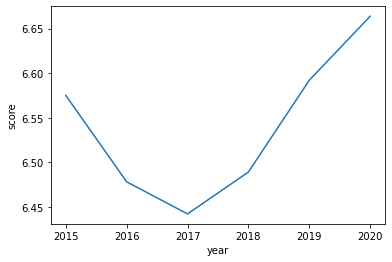

In [109]:
# Evolution of happiness for one country

# Filter the dataframe on one country
df_france = df_merge.loc[df_merge['country'] == 'France']

# Plot a chart
sns.lineplot(data=df_france, x="year", y="score")

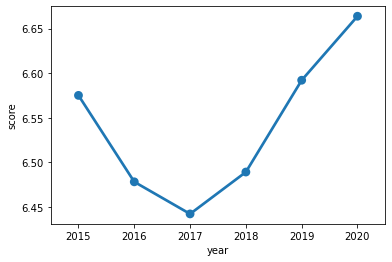

In [110]:
sns.pointplot(x="year", y="score", data=df_france)

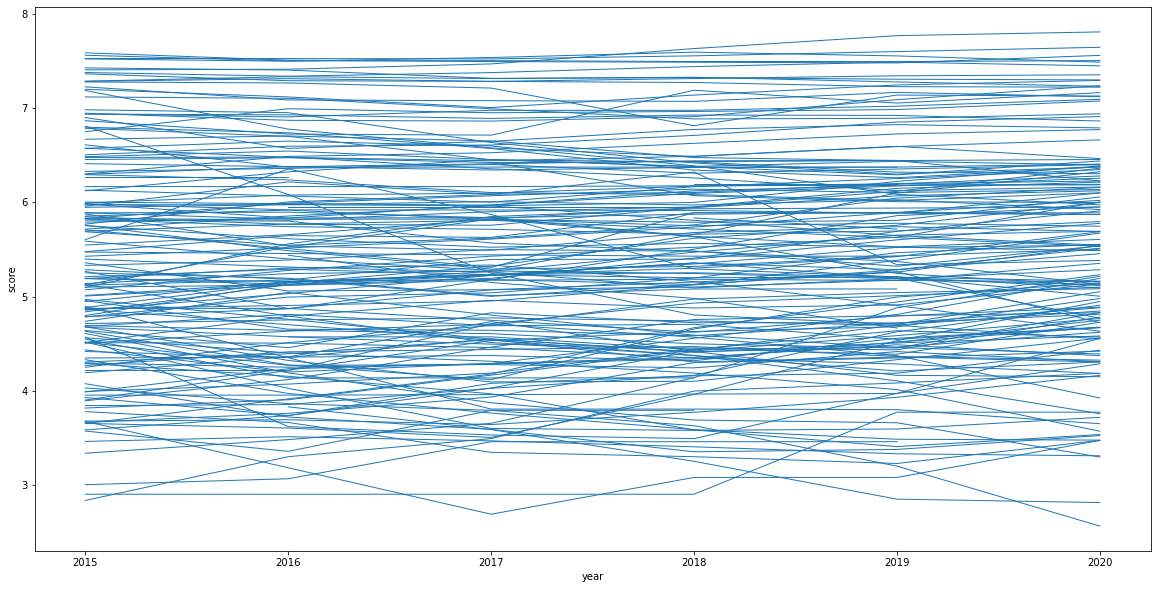

In [113]:
# Let’s plot the evolution for all countries. Is that lisible ?
plt.figure(figsize=(20,10))
sns.lineplot(
    data=df_merge,
    x="year", y="score", units="country",
    estimator=None, lw=1,
)

In [106]:
# 3-B-1 Separating countries that have a positive / negative trend
#------------------------#
# Now I want to distinguish countries where the trend is positive (2020 score > 2015 score) versus negative
# For this, I need to compute the trend value by country. We will use the pandas'pivot functions
# to easily compute a new variable for each country
# In the seaborn world, this shape is called Wide-form : https://seaborn.pydata.org/tutorial/data_structure.html
pivot = df_merge.pivot(index ='country', columns='year', values='score')
pivot.head()

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Afghanistan,3.575,3.360,3.794,3.632,3.203,2.5669
Albania,4.959,4.655,4.644,4.586,4.719,4.8827
Algeria,5.605,6.355,5.872,5.295,5.211,5.0051
Angola,4.033,3.866,3.795,3.795,NaN,NaN
Argentina,6.574,6.650,6.599,6.388,6.086,5.9747


In [79]:
# computing the trend value for each country
df_pivot = pd.DataFrame(pivot.to_records())
df_pivot['trend'] = (df_pivot['2020'] - df_pivot['2015']) > 0
df_pivot.head()

,country,2015,2016,2017,2018,2019,2020,trend
0,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.5669,False
1,Albania,4.959,4.655,4.644,4.586,4.719,4.8827,False
2,Algeria,5.605,6.355,5.872,5.295,5.211,5.0051,False
3,Angola,4.033,3.866,3.795,3.795,NaN,NaN,False
4,Argentina,6.574,6.650,6.599,6.388,6.086,5.9747,False


In [87]:
# now we want to go back to the Long-form format, it's often easier to plot in seaborn
df_melted = pd.melt(df_pivot, id_vars=['country', 'trend'], value_vars=['2015', '2016', '2017', '2018', '2019', '2020'], var_name='year', value_name='score')
df_melted.head()

,country,trend,year,score
0,Afghanistan,False,2015,3.575
1,Albania,False,2015,4.959
2,Algeria,False,2015,5.605
3,Angola,False,2015,4.033
4,Argentina,False,2015,6.574


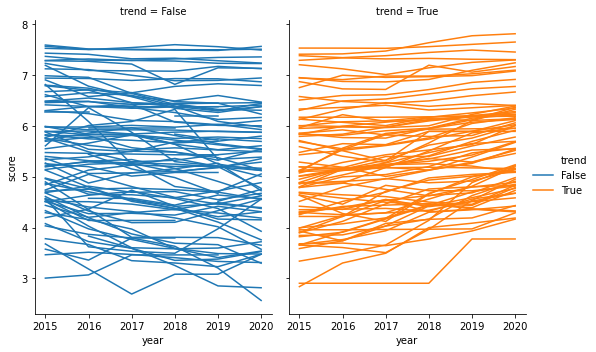

In [115]:
# plotting the 
sns.relplot(
    data=df_melted,
    x="year", y="score",
    hue="trend", col="trend",
    units='country', estimator=None,
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

In [70]:
# 3-B-2 Looking at more specific groups of countries : the most and the least happy
#------------------------#
# Let's arbitrarily define "happy countries" by the fact of having a score higher than 7 in 2020
df_high_happiness = df_merge[(df_merge['year'] == 2020) & (df_merge['score'] > 7)]
df_low_happiness = df_merge[(df_merge['year'] == 2020) & (df_merge['score'] < 4.5)]
df_high_happiness.head()

,country,score,year
0,Finland,7.8087,2020
1,Denmark,7.6456,2020
2,Switzerland,7.5599,2020
3,Iceland,7.5045,2020
4,Norway,7.4880,2020


In [71]:
# we extract those countries's name
happy_countries = pd.Series(df_high_happiness['country'].unique())
less_happy_countries = pd.Series(df_low_happiness['country'].unique())
happy_countries

0            Finland
1            Denmark
2        Switzerland
3            Iceland
4             Norway
5        Netherlands
6             Sweden
7        New Zealand
8            Austria
9         Luxembourg
10            Canada
11         Australia
12    United Kingdom
13            Israel
14        Costa Rica
15           Ireland
16           Germany
dtype: object

In [72]:
# back to our data, we are creating a new dataframe filtering th original one with those selected countries's name
df_happy_countries = df_merge.loc[df_merge['country'].isin(happy_countries.values)]
df_less_happy_countries = df_merge.loc[df_merge['country'].isin(less_happy_countries.values)]

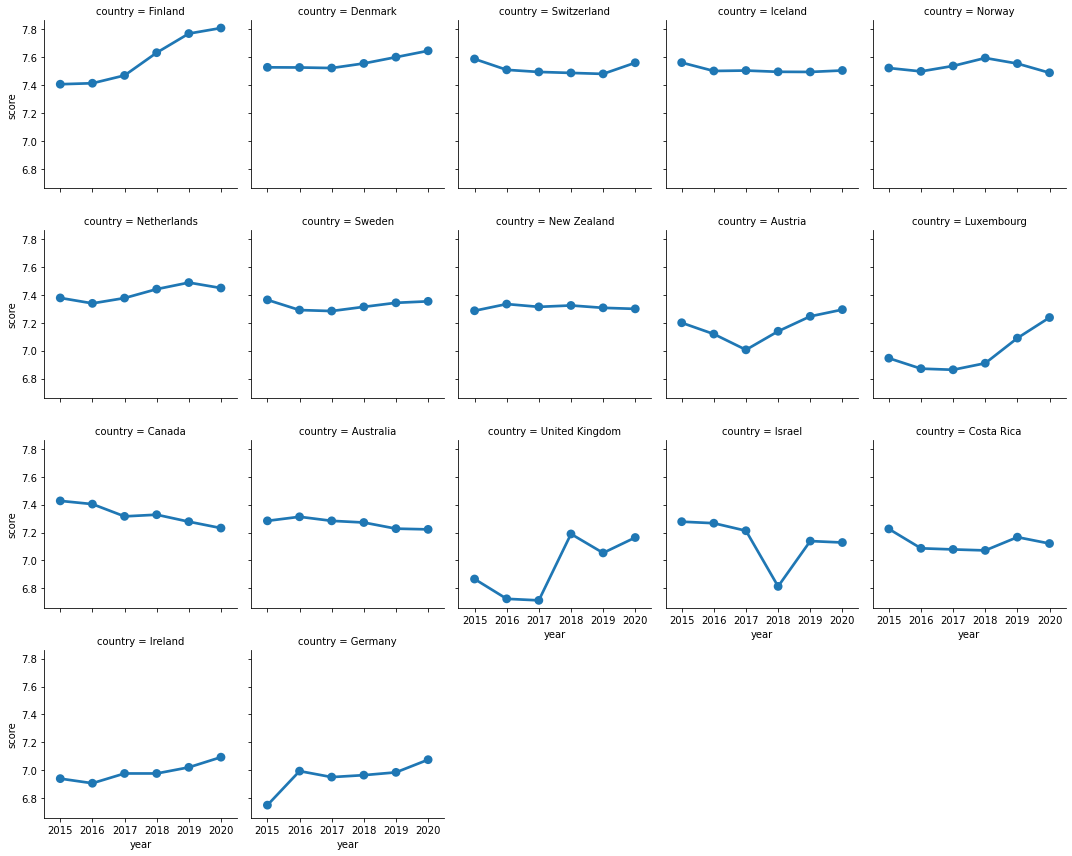

In [73]:
# in order to see the evolution clearly for each country, we are using a small multiple plot
# note how the x and y axis have the same scale so that it is easier to compare visualy all the countries
# we are using a linked point plot here to keep in mind that it's an evolution, but we don't have really linear data
g = sns.FacetGrid(df_happy_countries, col="country", col_wrap=5, height=3)
g.map(sns.pointplot, "year", "score", order=[2015, 2016, 2017, 2018, 2019, 2020])

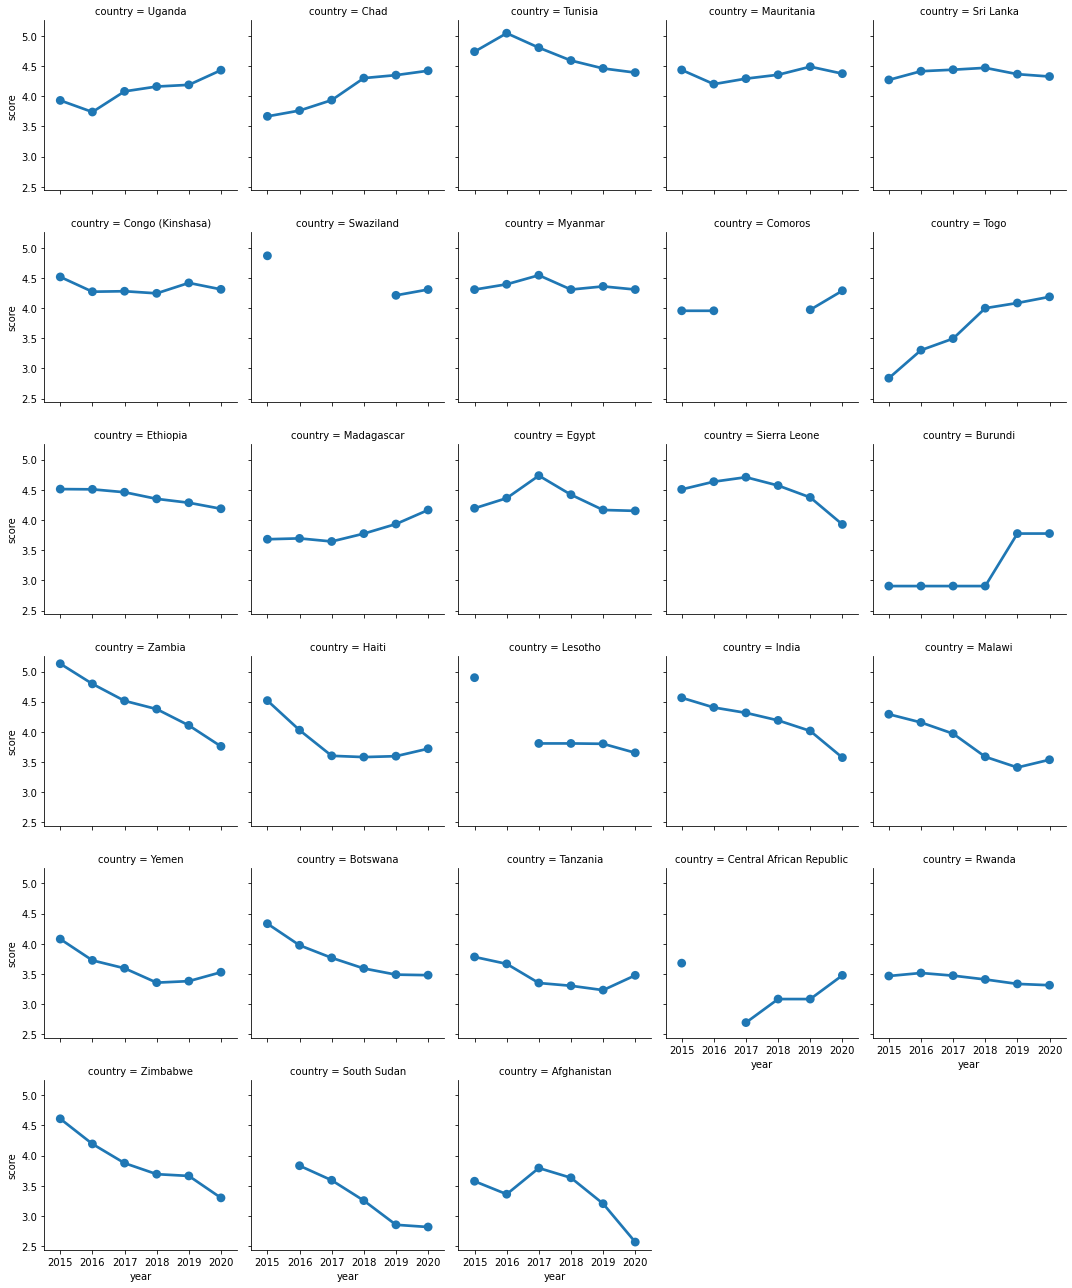

In [74]:
g = sns.FacetGrid(df_less_happy_countries, col="country", col_wrap=5, height=3)
g.map(sns.pointplot, "year", "score", order=[2015, 2016, 2017, 2018, 2019, 2020])